<a href="https://colab.research.google.com/github/omololaesther/Hamoye/blob/main/TimeSeries_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data = pd.read_csv('/content/household_power_consumption.txt',sep = ';')

Data['Date'] = pd.to_datetime(Data['Date'], format='%d/%m/%Y')
Data['Time'] = pd.to_datetime(Data['Time'], format='%H:%M:%S')
Data

#Data['DateTime'] = pd.to_datetime(Data['Date'] + ' ' + Data['Time'], format='%d/%m/%Y %H:%M:%S')
#Data['DateTime'] = Data['Date'] + pd.to_timedelta(Data['Time'].Data.strftime('%H:%M:%S'))

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1900-01-01 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16,1900-01-01 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16,1900-01-01 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16,1900-01-01 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16,1900-01-01 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
311587,2007-07-21,1900-01-01 02:31:00,0.340,0.254,233.590,1.800,0.000,1.000,0.0
311588,2007-07-21,1900-01-01 02:32:00,0.348,0.286,233.450,1.800,0.000,1.000,0.0
311589,2007-07-21,1900-01-01 02:33:00,0.348,0.286,233.550,1.800,0.000,1.000,0.0
311590,2007-07-21,1900-01-01 02:34:00,0.348,0.286,233.520,1.800,0.000,1.000,0.0


In [2]:
Data.isnull().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       1
Voltage                     1
Global_intensity            1
Sub_metering_1              1
Sub_metering_2              1
Sub_metering_3           3906
dtype: int64

<Figure size 1500x600 with 0 Axes>

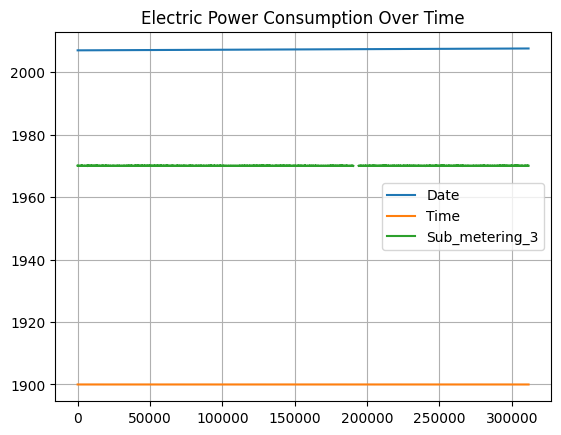

In [3]:
plt.figure(figsize=(15, 6))
Data.plot(title='Electric Power Consumption Over Time')
plt.grid()
plt.show()

<ipython-input-4-67010e1a3e27>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Minute_Data = Data.resample('M').sum()


<Axes: title={'center': 'Electric Power Consumption Pre Minute'}, xlabel='Date'>

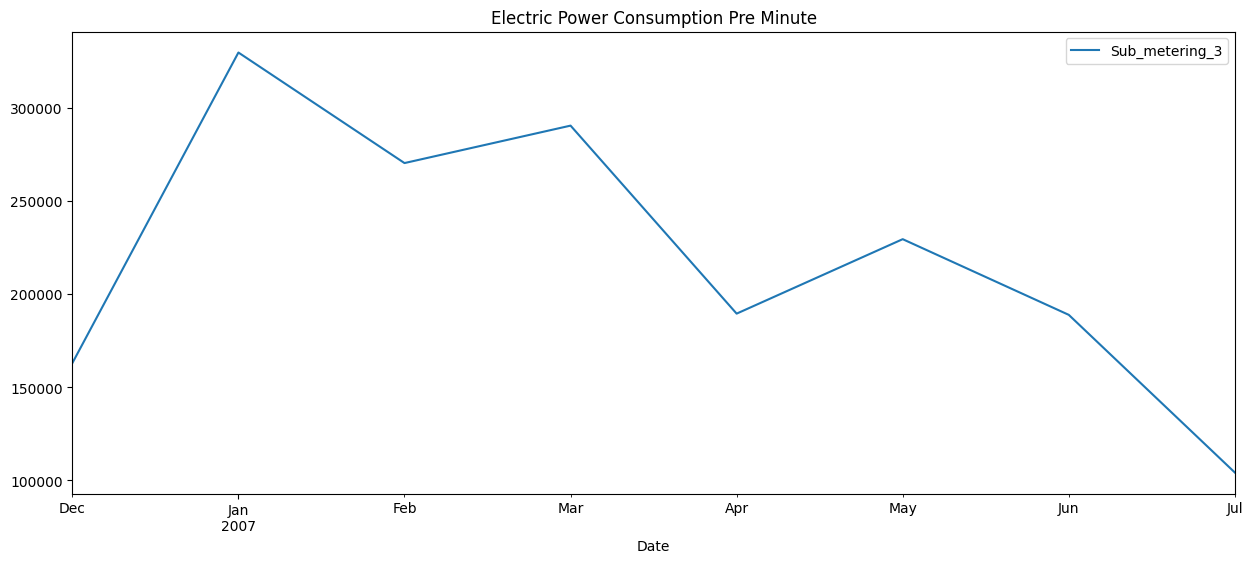

In [4]:
Data.set_index('Date', inplace=True)
Minute_Data = Data.resample('M').sum()
Minute_Data.plot(figsize=(15, 6), title='Electric Power Consumption Pre Minute')

# Fill any missing values if necessary
#Minute_Data = Minute_Data.fillna(method='ffill')

In [5]:
Minute_Data.isnull().sum()

Sub_metering_3    0
dtype: int64

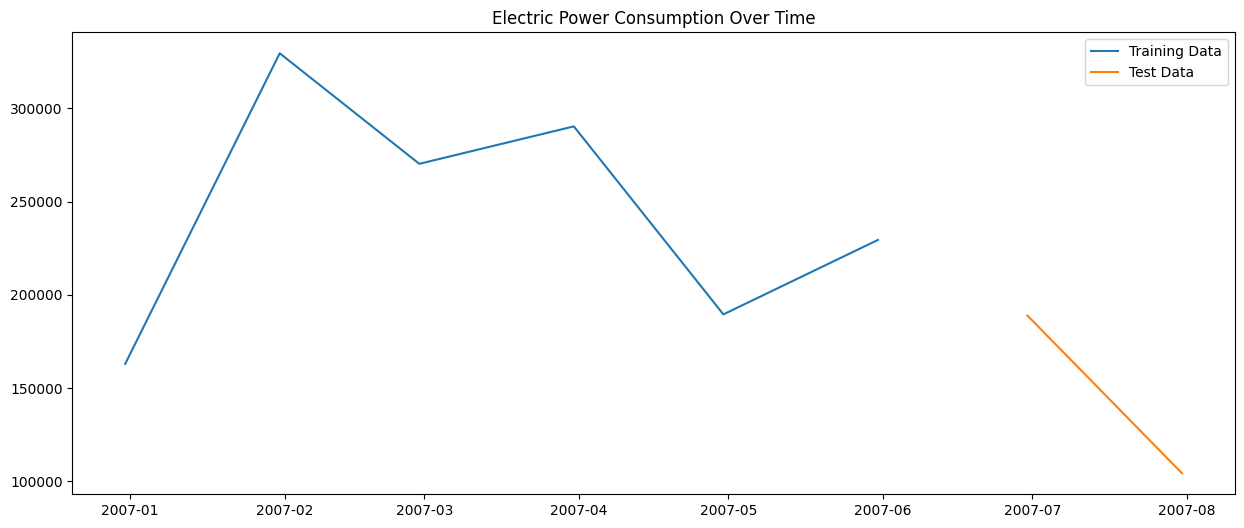

In [6]:
train_size = int(len(Minute_Data) * 0.8)
train, test = Minute_Data[:train_size], Minute_Data[train_size:]

plt.figure(figsize=(15, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.title('Electric Power Consumption Over Time')
plt.legend()
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 MB/s eta 0:00:00


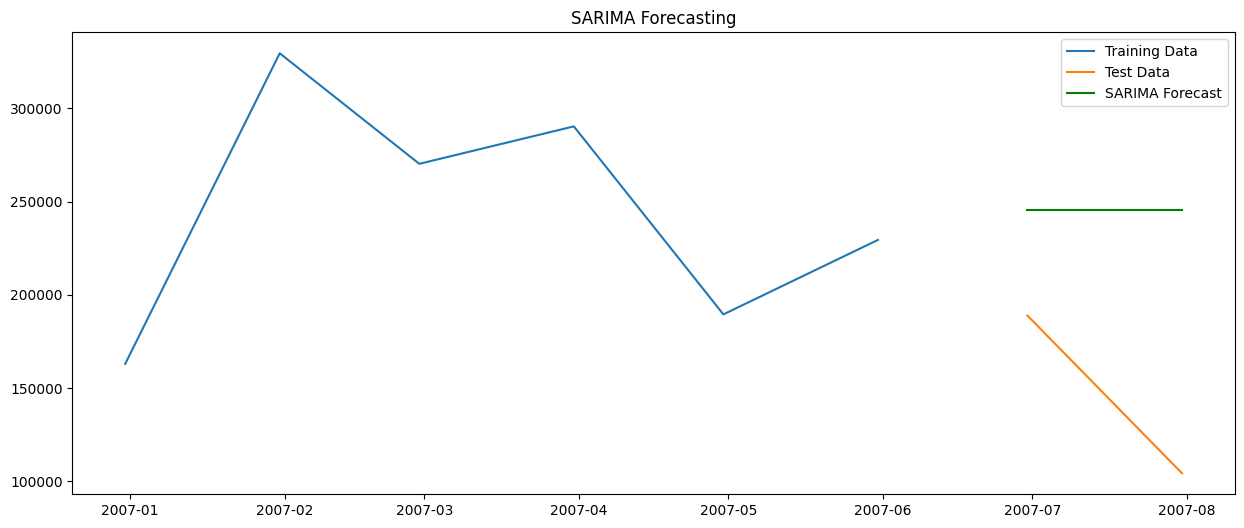

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima

from pmdarima import auto_arima

# auto_arima automatically select the best SARIMA model
sarima_model = auto_arima(train)

sarima_model.fit(train)

Sarima_Forecast = sarima_model.predict(n_periods=len(test))

plt.figure(figsize=(15, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, Sarima_Forecast, label='SARIMA Forecast', color='green')
plt.title('SARIMA Forecasting')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error

# Evaluate SARIMA
SARIMA_RMSE = mean_squared_error(test, Sarima_Forecast, squared=False)
print(f"SARIMA RMSE: {SARIMA_RMSE}")

SARIMA RMSE: 107467.16785721121


In [9]:
!pip install Prophet

import prophet

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

Univariate_Data = Data[['Time', 'Global_active_power']].rename(columns={'Time': 'dt', 'Global_active_power': 'y'})
Univariate_Data

,dt,y
Date,,
2006-12-16,1900-01-01 17:24:00,4.216
2006-12-16,1900-01-01 17:25:00,5.360
2006-12-16,1900-01-01 17:26:00,5.374
2006-12-16,1900-01-01 17:27:00,5.388
2006-12-16,1900-01-01 17:28:00,3.666
...,...,...
2007-07-21,1900-01-01 02:31:00,0.340
2007-07-21,1900-01-01 02:32:00,0.348
2007-07-21,1900-01-01 02:33:00,0.348


In [11]:
# Sorting the data by 'dt'
data = Univariate_Data.sort_values('dt')

# Spliting the data into a train and test sets
train = data[:-300]
test = data[-300:]

Model = Prophet()

Model.fit(train)

NameError: ignored